<a href="https://colab.research.google.com/github/TheHopelessFictoromantic/SalesPrediction_MLMiniProject/blob/main/SalesPredictionAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sktime

     |████████████████████████████████| 6.7 MB 4.8 MB/s 
     |████████████████████████████████| 3.3 MB 48.3 MB/s 
     |████████████████████████████████| 9.8 MB 46.6 MB/s 
     |████████████████████████████████| 34.5 MB 8.7 kB/s 


In [ ]:
#For upload
from google.colab import drive

#Libraries for prediction
import pandas as pd
from google.colab import files
import io
import numpy as np
from numpy import loadtxt
from xgboost import XGBRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_scaled_error
from sklearn.preprocessing import LabelEncoder
import math

#Libraries for analysis
import seaborn as sborn
import matplotlib.pyplot as plot

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Restaurant_Data= pd.read_csv('/content/drive/MyDrive/SalesPrediction/RestaurantData_Training.csv')

In [ ]:
Restaurant_Sales= Restaurant_Data.drop(['Day','Sales_Total','Backlink_Cnt',	'SocialMedia_Insights',	'Google_Ranking',	'Customer_Cnt',	'Domain_Authority'], axis=1)
Restaurant_DigitalTrends= Restaurant_Data.drop(['Panzenella',	'Bruschetta',	'Focaccia Bread',	'Pasta Carbonara',	'Margherita Pizza',	'Gnocchi',	'Risotto',	'Lasagna',	'Pasta Con Pomodoro E Basilico',	'Tiramisu',	'Gelato',	'Pistachio Panna Cota',	'Panettone', 'Fettucine Pomodoro',	'Stuffed Ravioli',	'Bottarga',	'Ribollita',	'Fiorentina Steak',	'Polenta ',	'Ossobuco',	'Truffle',	'Digestivo',	'Tagliatelle',	'Bagna Cauda',	'Sales_Total'], axis=1)

In [ ]:
Restaurant_Sales.set_index('Date', inplace= True)

In [ ]:
Restaurant_SalesTrain= Restaurant_Sales.transpose()

In [ ]:
Restaurant_SalesTrain.head()

Date,01-04-2022,02-04-2022,03-04-2022,04-04-2022,05-04-2022,06-04-2022,07-04-2022,08-04-2022,09-04-2022,10-04-2022,...,21-04-2022,22-04-2022,23-04-2022,24-04-2022,25-04-2022,26-04-2022,27-04-2022,28-04-2022,29-04-2022,30-04-2022
Panzenella,0,200,200,200,0,100,100,200,100,0,...,100,100,200,0,0,0,0,100,200,0
Bruschetta,0,100,200,200,100,0,200,200,100,0,...,200,0,100,100,0,0,200,100,0,200
Focaccia Bread,0,100,0,50,50,100,0,50,0,100,...,100,0,50,100,100,100,50,100,50,50
Pasta Carbonara,0,240,240,240,240,240,120,240,0,0,...,0,240,0,120,120,0,120,240,120,0
Margherita Pizza,0,120,120,240,240,120,0,120,0,240,...,120,240,0,0,240,240,120,0,120,0


In [ ]:
Restaurant_SalesTrain.reset_index(inplace=True)

In [ ]:
Restaurant_SalesTrain.head()

Date,index,01-04-2022,02-04-2022,03-04-2022,04-04-2022,05-04-2022,06-04-2022,07-04-2022,08-04-2022,09-04-2022,...,21-04-2022,22-04-2022,23-04-2022,24-04-2022,25-04-2022,26-04-2022,27-04-2022,28-04-2022,29-04-2022,30-04-2022
0,Panzenella,0,200,200,200,0,100,100,200,100,...,100,100,200,0,0,0,0,100,200,0
1,Bruschetta,0,100,200,200,100,0,200,200,100,...,200,0,100,100,0,0,200,100,0,200
2,Focaccia Bread,0,100,0,50,50,100,0,50,0,...,100,0,50,100,100,100,50,100,50,50
3,Pasta Carbonara,0,240,240,240,240,240,120,240,0,...,0,240,0,120,120,0,120,240,120,0
4,Margherita Pizza,0,120,120,240,240,120,0,120,0,...,120,240,0,0,240,240,120,0,120,0


In [ ]:
Restaurant_SalesTrain.rename(columns= {'index':'Item_Name'},inplace=True)

In [ ]:
Restaurant_SalesTrain.head()

Date,Item_Name,01-04-2022,02-04-2022,03-04-2022,04-04-2022,05-04-2022,06-04-2022,07-04-2022,08-04-2022,09-04-2022,...,21-04-2022,22-04-2022,23-04-2022,24-04-2022,25-04-2022,26-04-2022,27-04-2022,28-04-2022,29-04-2022,30-04-2022
0,Panzenella,0,200,200,200,0,100,100,200,100,...,100,100,200,0,0,0,0,100,200,0
1,Bruschetta,0,100,200,200,100,0,200,200,100,...,200,0,100,100,0,0,200,100,0,200
2,Focaccia Bread,0,100,0,50,50,100,0,50,0,...,100,0,50,100,100,100,50,100,50,50
3,Pasta Carbonara,0,240,240,240,240,240,120,240,0,...,0,240,0,120,120,0,120,240,120,0
4,Margherita Pizza,0,120,120,240,240,120,0,120,0,...,120,240,0,0,240,240,120,0,120,0


In [ ]:
SalesTotal=[]
l= len(Restaurant_SalesTrain['Item_Name'])
for i in range(l):
  SalesTotal.append(0)
Restaurant_SalesTrain['Sales_Total']= SalesTotal

In [ ]:
Restaurant_SalesTrain['Sales_Total']= Restaurant_SalesTrain.sum(axis=1)
Restaurant_SalesTrain.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date,Item_Name,01-04-2022,02-04-2022,03-04-2022,04-04-2022,05-04-2022,06-04-2022,07-04-2022,08-04-2022,09-04-2022,...,22-04-2022,23-04-2022,24-04-2022,25-04-2022,26-04-2022,27-04-2022,28-04-2022,29-04-2022,30-04-2022,Sales_Total
0,Panzenella,0,200,200,200,0,100,100,200,100,...,100,200,0,0,0,0,100,200,0,2800
1,Bruschetta,0,100,200,200,100,0,200,200,100,...,0,100,100,0,0,200,100,0,200,2900
2,Focaccia Bread,0,100,0,50,50,100,0,50,0,...,0,50,100,100,100,50,100,50,50,1600
3,Pasta Carbonara,0,240,240,240,240,240,120,240,0,...,240,0,120,120,0,120,240,120,0,4080
4,Margherita Pizza,0,120,120,240,240,120,0,120,0,...,240,0,0,240,240,120,0,120,0,3480


In [ ]:
ItemPrice= [100,	100,	50,	120,	120,	100,	70,	80,	100,	75,	50,	75,	80,	100,	100,	120,	120,	100,	75,	90, 75, 60, 120, 100]
idx=1
Restaurant_SalesTrain.insert(idx,'Item_Price',ItemPrice)

In [ ]:
Restaurant_SalesTrain.describe()

Date,Item_Price,01-04-2022,02-04-2022,03-04-2022,04-04-2022,05-04-2022,06-04-2022,07-04-2022,08-04-2022,09-04-2022,...,22-04-2022,23-04-2022,24-04-2022,25-04-2022,26-04-2022,27-04-2022,28-04-2022,29-04-2022,30-04-2022,Sales_Total
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,90.833333,74.375000,70.000000,77.291667,107.500000,92.500000,82.916667,81.250000,95.833333,89.375000,...,60.416667,108.125000,79.583333,85.833333,77.916667,71.250000,84.375000,61.666667,101.458333,2662.083333
std,21.752894,79.554637,94.914149,86.136635,89.406254,72.950251,74.146105,85.315909,78.111774,80.167115,...,75.266435,84.400862,69.170814,83.804465,86.060099,70.096983,74.151908,63.616833,88.212677,768.514825
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000
25%,75.000000,0.000000,0.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.250000
50%,100.000000,87.500000,0.000000,37.500000,100.000000,95.000000,85.000000,75.000000,100.000000,100.000000,...,25.000000,110.000000,85.000000,75.000000,75.000000,72.500000,100.000000,65.000000,100.000000,2750.000000
75%,100.000000,127.500000,105.000000,145.000000,200.000000,127.500000,120.000000,127.500000,152.500000,152.500000,...,100.000000,200.000000,120.000000,120.000000,120.000000,105.000000,125.000000,105.000000,200.000000,3140.000000
max,120.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,200.000000,...,240.000000,240.000000,200.000000,240.000000,240.000000,240.000000,240.000000,200.000000,240.000000,4080.000000


In [ ]:
def drop_duplicate(data, subset):
    data.drop_duplicates(subset,keep='first', inplace=True)
    data.reset_index(drop=True, inplace=True)

In [ ]:
print('Shape of dataset before duplicate check',Restaurant_SalesTrain.shape)

subset= ['Item_Name',	'Item_Price',	'01-04-2022',	'02-04-2022',	'03-04-2022',	'04-04-2022',	'05-04-2022',	'06-04-2022',	'07-04-2022',	'08-04-2022',	'09-04-2022',	'10-04-2022',	'11-04-2022',	'12-04-2022',	'13-04-2022',	'14-04-2022',	'15-04-2022',	'16-04-2022',	'17-04-2022',	'18-04-2022',	'19-04-2022',	'20-04-2022',	'21-04-2022',	'22-04-2022',	'23-04-2022',	'24-04-2022',
         '25-04-2022',	'26-04-2022',	'27-04-2022',	'28-04-2022',	'29-04-2022', '30-04-2022','Sales_Total']
drop_duplicate(Restaurant_SalesTrain,subset)

print('Shape of dataset after duplicate check',Restaurant_SalesTrain.shape)

Shape of dataset before duplicate check (24, 33)
Shape of dataset after duplicate check (24, 33)


In [ ]:
X = Restaurant_SalesTrain.drop(['Item_Name','Sales_Total'], axis=1)
Y = Restaurant_SalesTrain['Sales_Total']

In [ ]:
print(X)

Date  Item_Price  01-04-2022  02-04-2022  03-04-2022  04-04-2022  05-04-2022  \
0            100           0         200         200         200           0   
1            100           0         100         200         200         100   
2             50           0         100           0          50          50   
3            120           0         240         240         240         240   
4            120           0         120         120         240         240   
5            100         100         100           0         100         100   
6             70           0           0         140          70          70   
7             80           0           0           0           0         160   
8            100         100           0           0           0           0   
9             75         150           0           0           0         150   
10            50         100           0         100         100         100   
11            75         150           0

In [ ]:
print(Y)

0     2800
1     2900
2     1600
3     4080
4     3480
5     3200
6     2030
7     1520
8     2500
9     2400
10    1650
11    2175
12    1840
13    3000
14    3600
15    3480
16    3120
17    2700
18    2250
19    2970
20    1875
21    1740
22    4080
23    2900
Name: Sales_Total, dtype: int64


In [ ]:
Y_mean= np.mean(Y)
Y_SD= np.std(Y)
z_score=[]
for i in Y:
  z= (i-Y_mean)/(np.sqrt(3)*Y_SD)
  z_score.append(abs(z))
print(z_score)

[0.10583896345743608, 0.18258020584349255, 0.8150559451752414, 1.0881268659989587, 0.62767941168262, 0.4128039330016619, 0.48506860291519865, 0.8764489390840866, 0.1243847637007333, 0.20112600608678977, 0.7766853239822132, 0.3737938014554168, 0.6308769634487059, 0.259321448229549, 0.7197689025458878, 0.62767941168262, 0.35141093909281673, 0.029097721071379624, 0.3162378696658744, 0.23629907551373205, 0.6040175286135862, 0.7076182058347624, 1.0881268659989587, 0.18258020584349255]


In [ ]:
threshold = 2

# Position of the outlier

outlier_index=[]
print(np.where(z > threshold))
for i in range(len(z_score)):
  if z_score[i]>threshold:
    outlier_index.append(i)

(array([], dtype=int64),)


In [ ]:
X= X.drop(outlier_index)
Y= Y.drop(outlier_index)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(24, 31) (16, 31) (8, 31)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth': [3,6,8,10], #maximum depth of the tree from the root till the node
           'learning_rate': [0.001, 0.01, 0.05,0.3, 0.1],
           'n_estimators': [100, 500, 1000], #Maximum Number of Trees in the Regression forest
           'colsample_bytree': [0.06, 0.1, 0.2, 0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=parameters,
                   scoring='neg_root_mean_squared_error',
                   verbose=1)
clf.fit(X, Y)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:26] WARNING: /workspace/src/objective/re

In [ ]:
regressor = XGBRegressor(max_depth=3,
    n_estimators=1000,
    min_child_weight= 0.5, 
    colsample_bytree=0.2, 
    subsample=0.6, 
    reg_lambda= 1,
    gamma= 100,
    eta=0.05,
    seed=20)

In [ ]:
train_mean= np.mean(Y_train)
test_mean= np.mean(Y_test)

In [ ]:
Y_Train= Y_train.sub(train_mean)
Y_Test= Y_test.sub(test_mean)

In [ ]:
X_train.reset_index(drop=True,inplace= True)
Y_train.reset_index(drop=True,inplace= True)
X_test.reset_index(drop=True,inplace= True)
Y_test.reset_index(drop=True,inplace= True)
Y_Train.reset_index(drop=True,inplace= True)
Y_Test.reset_index(drop=True,inplace= True)

In [ ]:
regressor.fit(X_train, Y_train)

[10:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.2, eta=0.05, gamma=100, min_child_weight=0.5,
             n_estimators=1000, seed=20, subsample=0.6)

In [ ]:
Y_pred= regressor.predict(X_train)
rmsse_train = mean_squared_scaled_error(Y_train, Y_pred, y_train=Y_Train, square_root=True)
print(rmsse_train)

0.004976301788736613


In [ ]:
Y_test_pred= regressor.predict(X_test)
rmsse_test = mean_squared_scaled_error(Y_test, Y_test_pred, y_train=Y_Test, square_root=True)
print(rmsse_test)

0.5750199138647375


In [ ]:
#Precicting the digital marketing metrics
X_DM= Restaurant_DigitalTrends.drop(['Date','Day','Domain_Authority'],axis=1)
Y_DM= Restaurant_DigitalTrends['Domain_Authority']

In [ ]:
z_DM= np.abs(stats.zscore(Y_DM))

In [ ]:
threshold_DM = 2
# Position of the outlier
outlier_index=[]
print(np.where(z_DM > threshold))
for i in range(len(z_DM)):
  if z_DM[i]>threshold:
    outlier_index.append(i)

(array([], dtype=int64),)


In [ ]:
X_DM= X_DM.drop(outlier_index)
Y_DM= Y_DM.drop(outlier_index)

In [ ]:
X_DMtrain, X_DMtest, Y_DMtrain, Y_DMtest = train_test_split(X_DM, Y_DM, test_size=0.1)

In [ ]:
print(X_DM.shape, X_DMtrain.shape, X_DMtest.shape)

(30, 4) (27, 4) (3, 4)


In [ ]:
train_DMmean= np.mean(Y_DMtrain)
test_DMmean= np.mean(Y_DMtest)

In [ ]:
Y_DMTrain= Y_DMtrain.sub(train_DMmean)
Y_DMTest= Y_test.sub(test_DMmean)
print(Y_DMTrain,Y_DMTest)

15    0.585185
18    0.585185
3    -3.214815
4    -3.214815
8    -1.214815
2    -3.214815
22    2.285185
23    2.485185
14    0.385185
11   -0.214815
10   -0.614815
29    2.785185
12   -0.214815
6    -1.714815
7    -1.614815
13   -0.114815
0    -3.214815
24    2.685185
26    2.785185
25    2.685185
5    -3.214815
20    0.885185
27    2.785185
19    0.685185
17    0.585185
1    -3.214815
28    2.785185
Name: Domain_Authority, dtype: float64 0    1645.0
1    2895.0
2    1735.0
Name: Sales_Total, dtype: float64


In [ ]:
X_DMtrain.reset_index(drop=True,inplace= True)
Y_DMtrain.reset_index(drop=True,inplace= True)
X_DMtest.reset_index(drop=True,inplace= True)
Y_DMtest.reset_index(drop=True,inplace= True)
Y_DMTrain.reset_index(drop=True,inplace= True)
Y_DMTest.reset_index(drop=True,inplace= True)

In [ ]:
regressor.fit(X_DMtrain, Y_DMtrain)

[03:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.2, eta=0.05, gamma=100, min_child_weight=0.5,
             n_estimators=1000, seed=20, subsample=0.6)

In [ ]:
Y_test_DMpred= regressor.predict(X_DMtest)
rmsse_DMtest = mean_squared_scaled_error(Y_DMtest, Y_test_DMpred, y_train=Y_DMTest, square_root=True)
print(rmsse_DMtest)

0.000891658493869863


In [ ]:
from datetime import timedelta, date

In [ ]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
Next_Month=[]
start_dt = date(2022, 5, 1)
end_dt = date(2022,5,30)
for i in daterange(start_dt, end_dt):
  Next_Month.append(i.strftime("%d-%m-%Y"))
print(Next_Month)

['01-05-2022', '02-05-2022', '03-05-2022', '04-05-2022', '05-05-2022', '06-05-2022', '07-05-2022', '08-05-2022', '09-05-2022', '10-05-2022', '11-05-2022', '12-05-2022', '13-05-2022', '14-05-2022', '15-05-2022', '16-05-2022', '17-05-2022', '18-05-2022', '19-05-2022', '20-05-2022', '21-05-2022', '22-05-2022', '23-05-2022', '24-05-2022', '25-05-2022', '26-05-2022', '27-05-2022', '28-05-2022', '29-05-2022', '30-05-2022']


In [ ]:
Restaurant_DataForecast= Restaurant_Data.drop(['Date','Day','Sales_Total','Backlink_Cnt',	'SocialMedia_Insights',	'Google_Ranking',	'Customer_Cnt',	'Domain_Authority'], axis=1).copy()
idx=0
Restaurant_DataForecast.insert(idx,'Date', Next_Month)
Restaurant= Restaurant_DataForecast.copy()
Restaurant_DataForecast.set_index('Date', inplace= True)
Restaurant_ForecastTrain= Restaurant_DataForecast.transpose()
Restaurant_ForecastTrain.reset_index(inplace=True)
Restaurant_ForecastTrain.rename(columns= {'index':'Item_Name'},inplace=True)
SalesTotal=[]
col= Restaurant_ForecastTrain.shape
l1= col[0]
for k in range(l1):
  SalesTotal.append(0)
Restaurant_ForecastTrain['Sales_Total']= SalesTotal
Restaurant_ForecastTrain['Sales_Total']= Restaurant_ForecastTrain.sum(axis=1)
ItemPrice= [100,	100,	50,	120,	120,	100,	70,	80,	100,	75,	50,	75,	80,	100,	100,	120,	120,	100,	75,	90, 75, 60, 120, 100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


In [ ]:
Restaurant_ForecastTrain.insert(1,'Item_Price',ItemPrice)
Restaurant_ForecastTrain.head()

Date,Item_Name,Item_Price,01-05-2022,02-05-2022,03-05-2022,04-05-2022,05-05-2022,06-05-2022,07-05-2022,08-05-2022,...,22-05-2022,23-05-2022,24-05-2022,25-05-2022,26-05-2022,27-05-2022,28-05-2022,29-05-2022,30-05-2022,Sales_Total
0,Panzenella,100,0,200,200,200,0,100,100,200,...,100,200,0,0,0,0,100,200,0,2800
1,Bruschetta,100,0,100,200,200,100,0,200,200,...,0,100,100,0,0,200,100,0,200,2900
2,Focaccia Bread,50,0,100,0,50,50,100,0,50,...,0,50,100,100,100,50,100,50,50,1600
3,Pasta Carbonara,120,0,240,240,240,240,240,120,240,...,240,0,120,120,0,120,240,120,0,4080
4,Margherita Pizza,120,0,120,120,240,240,120,0,120,...,240,0,0,240,240,120,0,120,0,3480


In [ ]:
#Restructure the data
Restaurant_ForecastTrain["Target"] = Restaurant_ForecastTrain.Sales_Total.shift(-1)

# Drop the last null column because of shifting
Restaurant_ForecastTrain.dropna(inplace=True)
# Extract features & labels
X_forecasting = Restaurant_ForecastTrain.drop(['Item_Name','Sales_Total','Target'], axis=1)
y_forecasting = Restaurant_ForecastTrain['Target']

X_forecast_train, X_forecast_test, y_forecast_train, y_forecast_test = train_test_split(X_forecasting, y_forecasting, test_size = 0.33)

regressor.fit(X_forecast_train, y_forecast_train)

[12:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.2, eta=0.05, gamma=100, min_child_weight=0.5,
             n_estimators=1000, seed=20, subsample=0.6)

In [ ]:
Restaurant_ForecastTrain.head()

Date,Item_Name,Item_Price,01-05-2022,02-05-2022,03-05-2022,04-05-2022,05-05-2022,06-05-2022,07-05-2022,08-05-2022,...,23-05-2022,24-05-2022,25-05-2022,26-05-2022,27-05-2022,28-05-2022,29-05-2022,30-05-2022,Sales_Total,Target
0,Panzenella,100,0,200,200,200,0,100,100,200,...,200,0,0,0,0,100,200,0,2800,2900.0
1,Bruschetta,100,0,100,200,200,100,0,200,200,...,100,100,0,0,200,100,0,200,2900,1600.0
2,Focaccia Bread,50,0,100,0,50,50,100,0,50,...,50,100,100,100,50,100,50,50,1600,4080.0
3,Pasta Carbonara,120,0,240,240,240,240,240,120,240,...,0,120,120,0,120,240,120,0,4080,3480.0
4,Margherita Pizza,120,0,120,120,240,240,120,0,120,...,0,0,240,240,120,0,120,0,3480,3200.0


In [ ]:
item_distr = Restaurant_SalesTrain.groupby('Item_Name').agg('count')
item_labels = item_distr.Sales_Total.sort_values().index 
item_counts = item_distr.Item_Price.sort_values()

In [ ]:
from matplotlib.gridspec import GridSpec

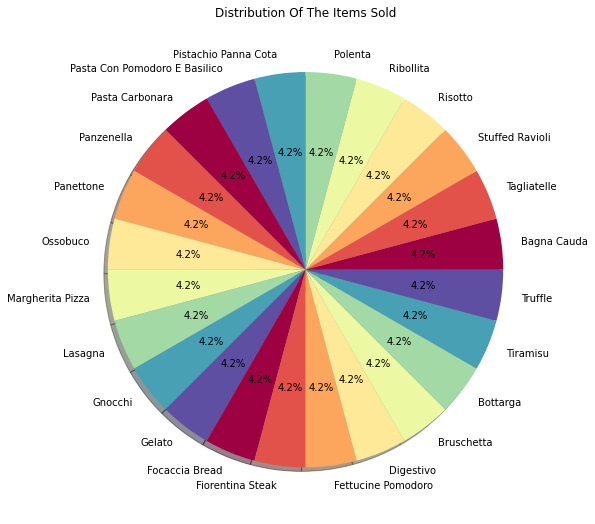

In [ ]:
plot.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plot.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plot.subplot(the_grid[0, 1], aspect=1, title='Distribution Of The Items Sold')
type_show_ids = plot.pie(item_counts, labels=item_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plot.show()

In [ ]:
predictions_xgb = regressor.predict(X_forecast_test)
predictions_xgb = pd.DataFrame({'Predictions': predictions_xgb})
result_xgb = pd.concat( [Restaurant_ForecastTrain.tail(len(X_forecast_test)).reset_index(drop=True),predictions_xgb], axis=1)
print (result_xgb)

            Item_Name  01-05-2022  02-05-2022  03-05-2022  04-05-2022  \
0           Panettone         160           0         160           0   
1  Fettucine Pomodoro         100           0           0         200   
2     Stuffed Ravioli           0           0           0         200   
3            Bottarga           0         240         120         240   
4           Ribollita         240         240         120           0   
5    Fiorentina Steak           0           0           0         100   
6            Polenta          150           0           0         150   

   05-05-2022  06-05-2022  07-05-2022  08-05-2022  09-05-2022  ...  \
0          80           0           0           0         160  ...   
1         200         200         100           0           0  ...   
2         100         200         200         100         200  ...   
3           0           0         240         120         120  ...   
4           0         120         240           0           0  ..

In [ ]:
y_forecast_Test= y_forecast_test.sub(np.mean(y_forecast_test))

In [ ]:
y_forecast_Test.reset_index(drop=True,inplace= True)
y_forecast_test.reset_index(drop=True,inplace= True)
predictions_xgb.reset_index(drop=True,inplace= True)

In [ ]:

rmsse_xgb = mean_squared_scaled_error(y_forecast_test, predictions_xgb, y_train=y_forecast_Test, square_root=True)
print(rmsse_xgb)

0.7305860985342488


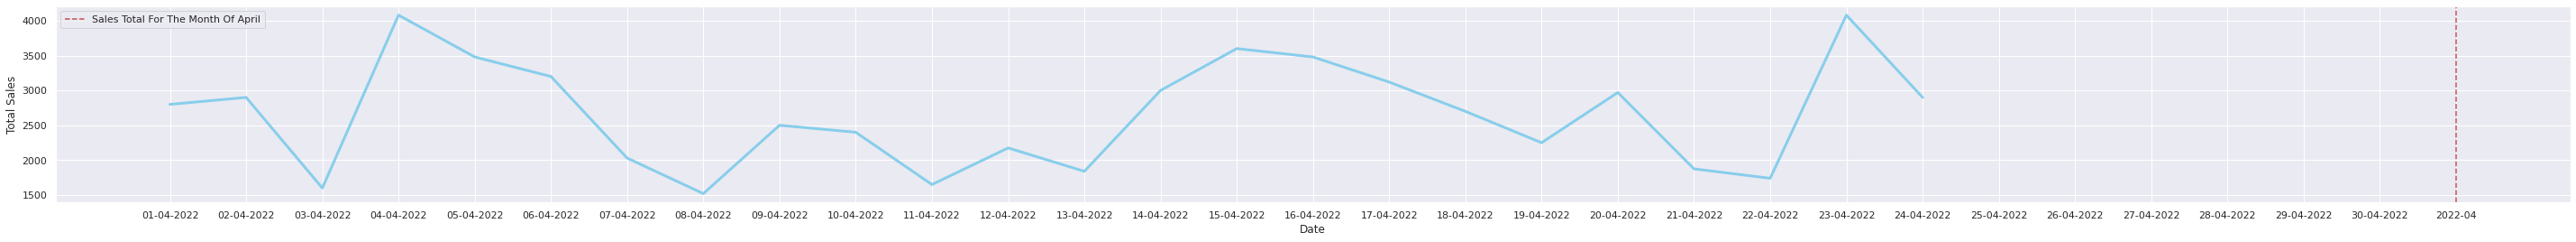

In [ ]:
sborn.set(style = 'darkgrid')
plot.figure(figsize = (50,4))

sborn.lineplot(data = Restaurant_SalesTrain['Sales_Total'], x = Restaurant_Data['Date'], y = Restaurant_SalesTrain['Sales_Total'], color = 'skyblue', linewidth = 3)
plot.axvline(x = '2022-04', color = 'r', linestyle = '--', label = 'Sales Total For The Month Of April')

plot.legend()
plot.title('', size = 16)
plot.xlabel('Date')
plot.ylabel('Total Sales')
plot.show()

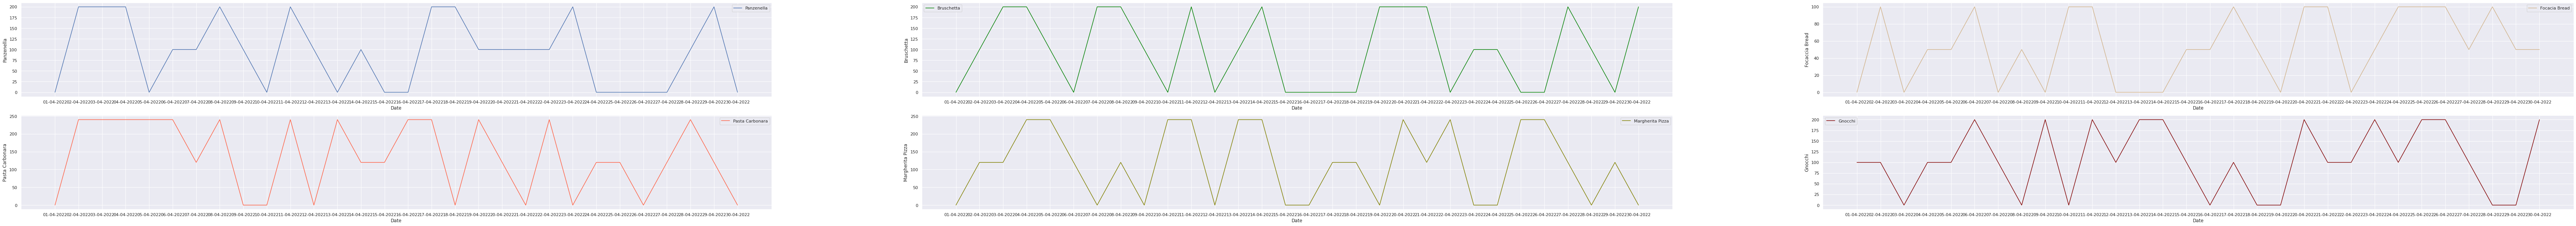

In [ ]:
sborn.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plot.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(120,10)
sborn.lineplot(data = Restaurant_Data['Panzenella'], x = Restaurant_Data['Date'], y = Restaurant_Data['Panzenella'], label = 'Panzenella', ax = ax1)
sborn.lineplot(data = Restaurant_Data['Bruschetta'], x = Restaurant_Data['Date'], y = Restaurant_Data['Bruschetta'], label = 'Bruschetta', ax = ax2, color = 'green')
sborn.lineplot(data = Restaurant_Data['Focaccia Bread'], x = Restaurant_Data['Date'], y = Restaurant_Data['Focaccia Bread'], label = 'Focacia Bread', ax = ax3, color = 'Tan')
sborn.lineplot(data = Restaurant_Data['Pasta Carbonara'], x = Restaurant_Data['Date'], y = Restaurant_Data['Pasta Carbonara'], label = 'Pasta Carbonara', ax = ax4, color = 'Tomato')
sborn.lineplot(data = Restaurant_Data['Margherita Pizza'], x = Restaurant_Data['Date'], y = Restaurant_Data['Margherita Pizza'], label = 'Margherita Pizza', ax = ax5, color = 'Olive')
sborn.lineplot(data = Restaurant_Data['Gnocchi'], x = Restaurant_Data['Date'], y = Restaurant_Data['Gnocchi'], label = 'Gnocchi', ax = ax6, color = 'Maroon')

plot.legend()
plot.show()

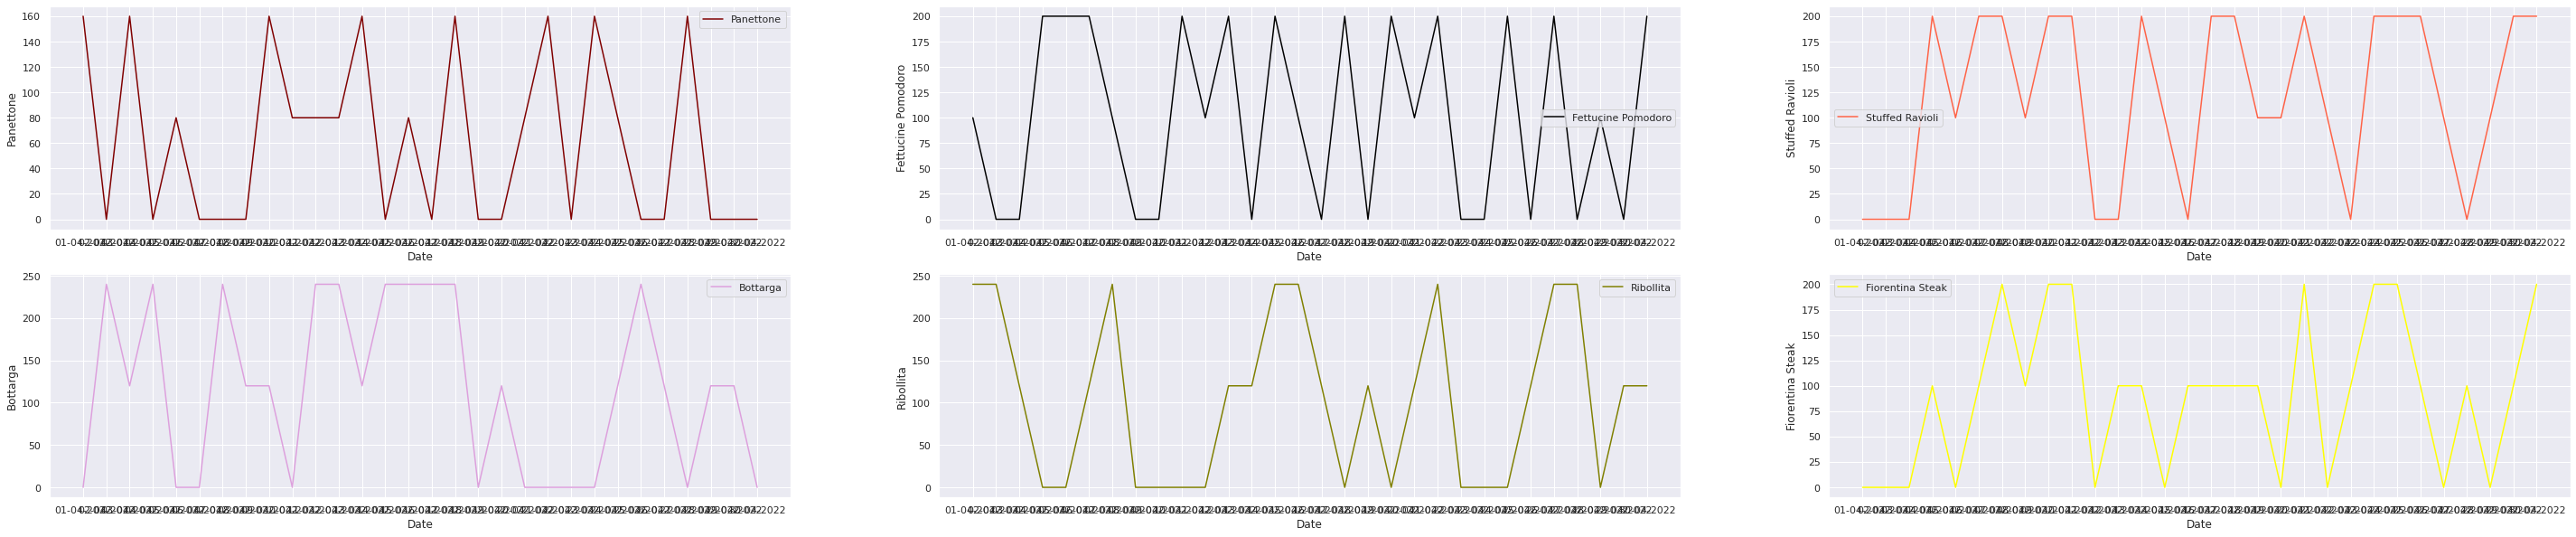

In [ ]:
sborn.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plot.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(50,10)
sborn.lineplot(data = Restaurant_Data['Panettone'], x = Restaurant_Data['Date'], y = Restaurant_Data['Panettone'], label = 'Panettone', ax = ax1, color = 'Maroon')
sborn.lineplot(data = Restaurant_Data['Fettucine Pomodoro'], x = Restaurant_Data['Date'], y = Restaurant_Data['Fettucine Pomodoro'], label = 'Fettucine Pomodoro', ax = ax2, color = 'black')
sborn.lineplot(data = Restaurant_Data['Stuffed Ravioli'], x = Restaurant_Data['Date'], y = Restaurant_Data['Stuffed Ravioli'], label = 'Stuffed Ravioli', ax = ax3, color = 'Tomato')
sborn.lineplot(data = Restaurant_Data['Bottarga'], x = Restaurant_Data['Date'], y = Restaurant_Data['Bottarga'], label = 'Bottarga', ax = ax4, color = 'Plum')
sborn.lineplot(data = Restaurant_Data['Ribollita'], x = Restaurant_Data['Date'], y = Restaurant_Data['Ribollita'], label = 'Ribollita', ax = ax5, color = 'Olive')
sborn.lineplot(data = Restaurant_Data['Fiorentina Steak'], x = Restaurant_Data['Date'], y = Restaurant_Data['Fiorentina Steak'], label = 'Fiorentina Steak', ax = ax6, color = 'yellow')

plot.legend()
plot.show()

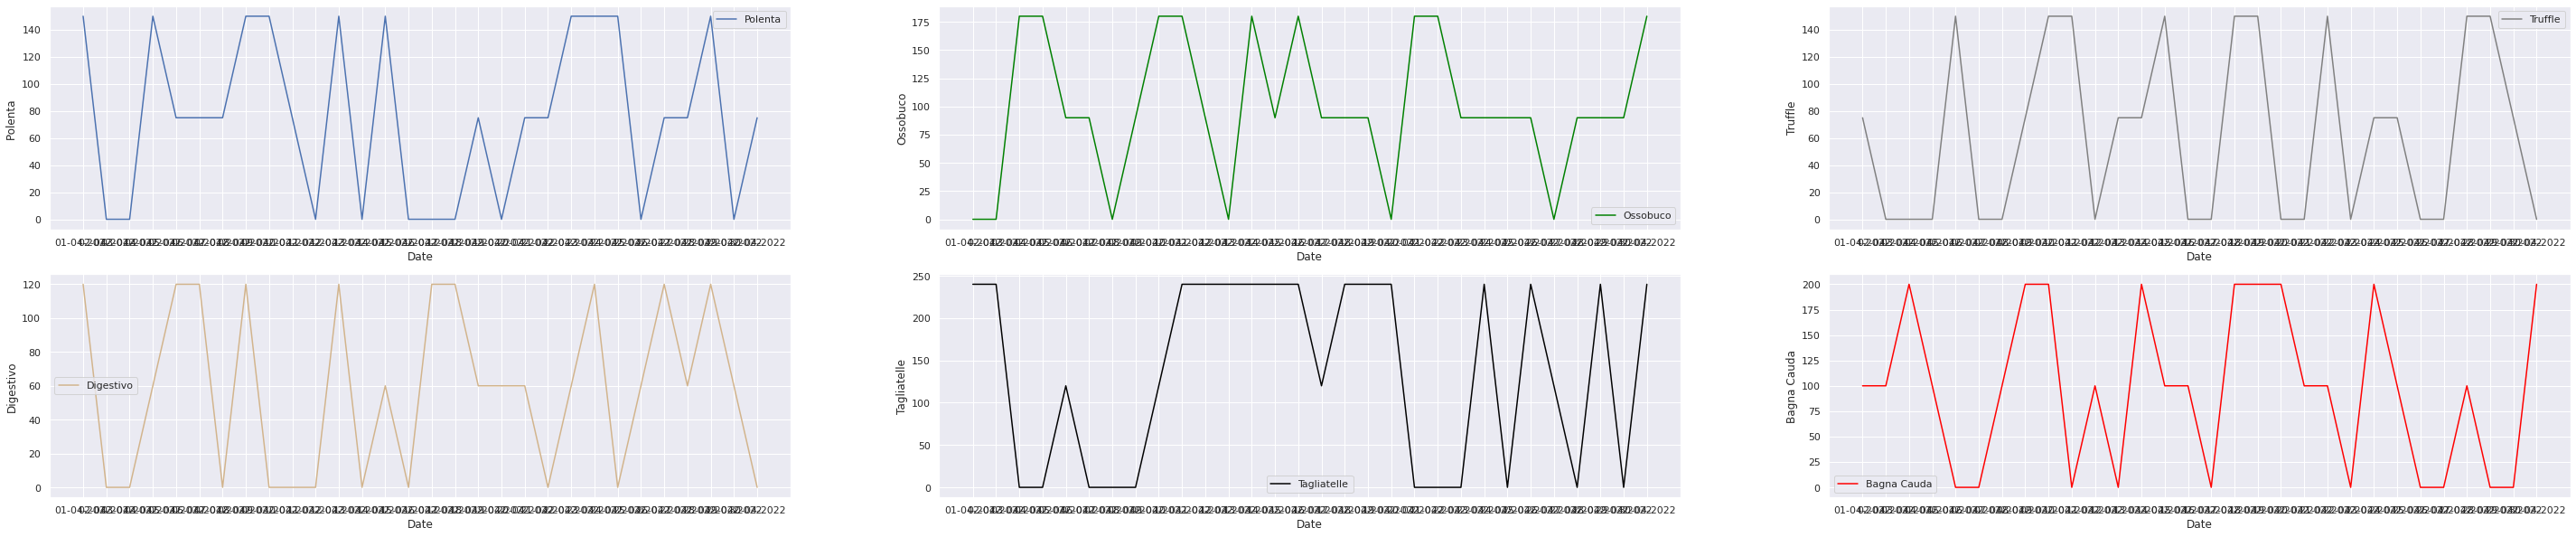

In [ ]:
sborn.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plot.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(50,10)
sborn.lineplot(data = Restaurant_Data['Polenta '], x = Restaurant_Data['Date'], y = Restaurant_Data['Polenta '], label = 'Polenta', ax = ax1)
sborn.lineplot(data = Restaurant_Data['Ossobuco'], x = Restaurant_Data['Date'], y = Restaurant_Data['Ossobuco'], label = 'Ossobuco', ax = ax2, color = 'green')
sborn.lineplot(data = Restaurant_Data['Truffle'], x = Restaurant_Data['Date'], y = Restaurant_Data['Truffle'], label = 'Truffle', ax = ax3, color = 'gray')
sborn.lineplot(data = Restaurant_Data['Digestivo'], x = Restaurant_Data['Date'], y = Restaurant_Data['Digestivo'], label = 'Digestivo', ax = ax4, color = 'Tan')
sborn.lineplot(data = Restaurant_Data['Tagliatelle'], x = Restaurant_Data['Date'], y = Restaurant_Data['Tagliatelle'], label = 'Tagliatelle', ax = ax5, color = 'black')
sborn.lineplot(data = Restaurant_Data['Bagna Cauda'], x = Restaurant_Data['Date'], y = Restaurant_Data['Bagna Cauda'], label = 'Bagna Cauda', ax = ax6, color = 'red')

plot.legend()
plot.show()

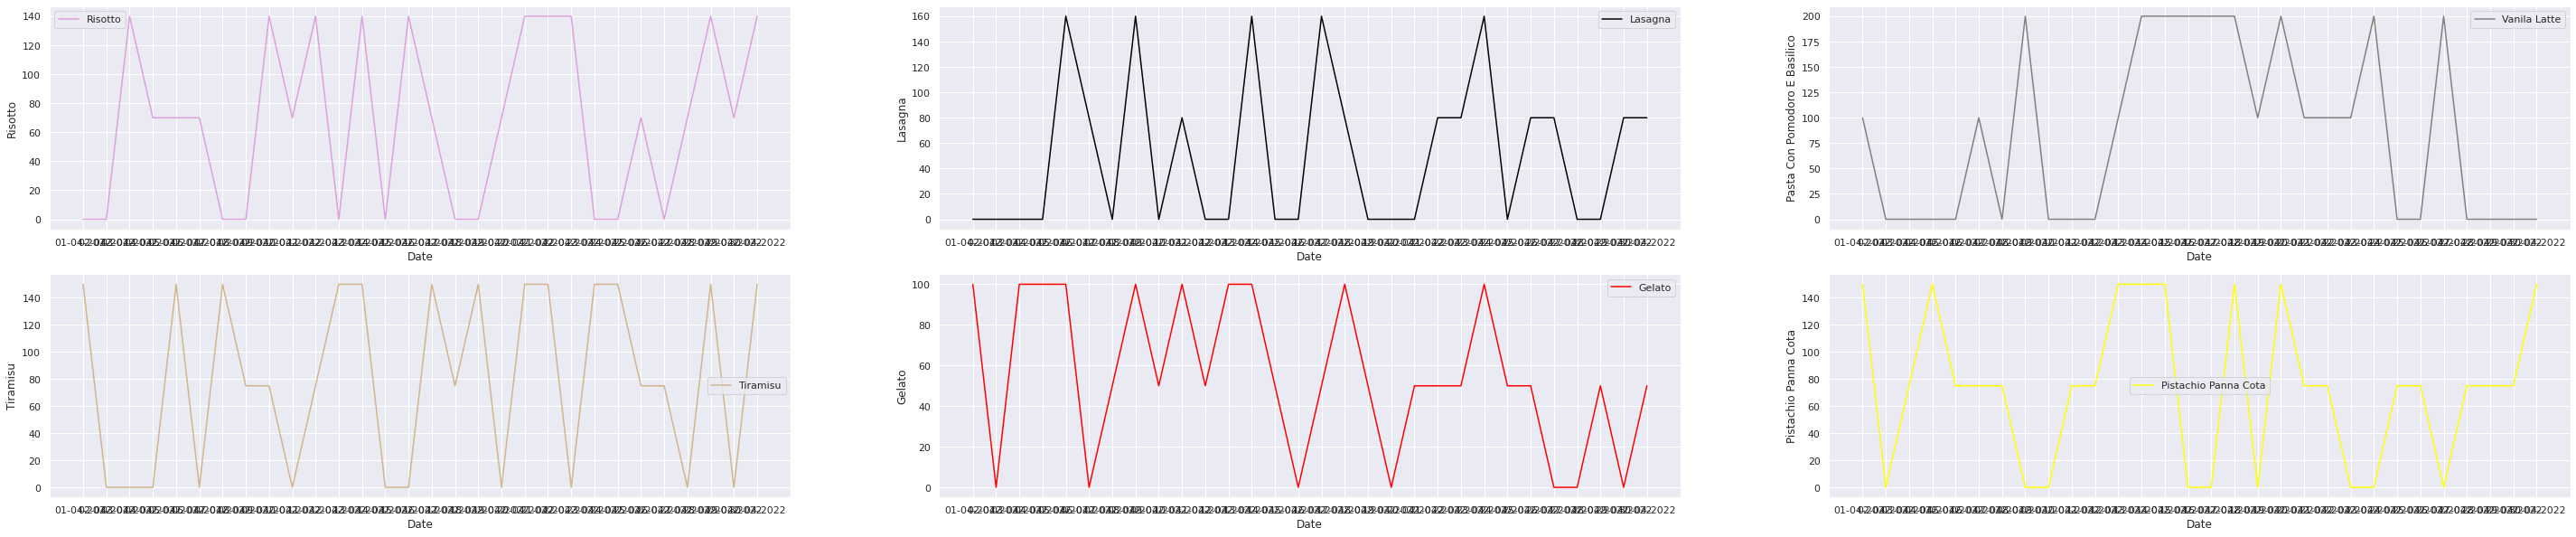

In [ ]:
sborn.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plot.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(50,10)
sborn.lineplot(data = Restaurant_Data['Risotto'], x=Restaurant_Data['Date'], y = Restaurant_Data['Risotto'], label = 'Risotto', ax = ax1, color = 'Plum')
sborn.lineplot(data = Restaurant_Data['Lasagna'], x=Restaurant_Data['Date'], y = Restaurant_Data['Lasagna'], label = 'Lasagna', ax = ax2, color = 'black')
sborn.lineplot(data = Restaurant_Data['Pasta Con Pomodoro E Basilico'],x= Restaurant_Data['Date'], y = Restaurant_Data['Pasta Con Pomodoro E Basilico'], label = 'Vanila Latte', ax = ax3, color = 'gray')
sborn.lineplot(data = Restaurant_Data['Tiramisu'], x = Restaurant_Data['Date'], y = Restaurant_Data['Tiramisu'], label = 'Tiramisu', ax = ax4, color = 'Tan')
sborn.lineplot(data = Restaurant_Data['Gelato'], x = Restaurant_Data['Date'], y = Restaurant_Data['Gelato'], label = 'Gelato', ax = ax5, color = 'red')
sborn.lineplot(data = Restaurant_Data['Pistachio Panna Cota'], x = Restaurant_Data['Date'], y = Restaurant_Data['Pistachio Panna Cota'], label = 'Pistachio Panna Cota', ax = ax6, color = 'yellow')

plot.legend()
plot.show()

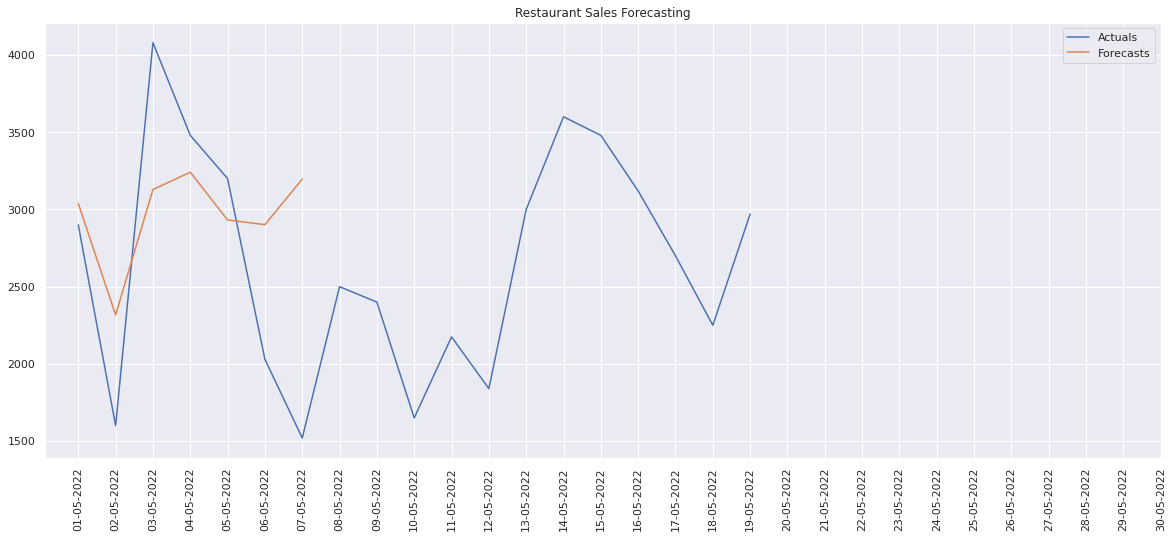

In [ ]:
plot.figure(figsize=(20,8))
m= len(Restaurant_ForecastTrain['Target'])
n= len(result_xgb['Predictions'])
plot.plot(Restaurant['Date'].iloc[0:m], Restaurant_ForecastTrain['Target'], label='Actuals')
plot.plot(Restaurant['Date'].iloc[0:n],  result_xgb['Predictions'], label='Forecasts')
plot.xticks(Restaurant['Date'], Restaurant['Date'], rotation='vertical')
plot.legend(loc='best')
plot.title("Restaurant Sales Forecasting")
plot.show()